In [2]:
from scipy.spatial import Voronoi,voronoi_plot_2d
import numpy as np
from joblib import dump, load
import scipy.io
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.model_selection import GridSearchCV
from joblib import dump, load
import scipy.io
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])

In [353]:
modeloSVM = load('modeloSVM.joblib') 


C:\Users\duch9\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator SVR from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\duch9\Anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [388]:
jsonModelSVM=modeloSVM.cv_results_

In [153]:
modeloSVM.best_estimator_

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [73]:
list(jsonModelSVM.keys())

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_C',
 'param_gamma',
 'param_kernel',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score']

In [75]:
len(jsonModelSVM["std_test_score"])

60

In [146]:
modeloSVM.best_score_



-0.07055820741242444

In [150]:
def stopCondition(modelList,TargetScore):
    performance = list()
    for model in modelList:
        score=model.best_score_
        performance.append(score)
    BestModel=np.array(performance).argmax()
    if performance[BestModel]>TargetScore:
        return modelList[BestModel]
    else:
        return False
    
    

In [152]:
stopCondition([modeloSVM,modeloSVM],-.1)

-0.07055820741242444


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 10, 100, 1000, 10000, 'auto'],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [80]:
mdlScores=jsonModelSVM["std_test_score"]

In [82]:
np.mean(mdlScores)

0.30965623165272754

In [86]:
jsonModelSVM['params'][:30]

[{'C': 0.01, 'gamma': 1, 'kernel': 'linear'},
 {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'},
 {'C': 0.01, 'gamma': 10, 'kernel': 'linear'},
 {'C': 0.01, 'gamma': 10, 'kernel': 'rbf'},
 {'C': 0.01, 'gamma': 100, 'kernel': 'linear'},
 {'C': 0.01, 'gamma': 100, 'kernel': 'rbf'},
 {'C': 0.01, 'gamma': 1000, 'kernel': 'linear'},
 {'C': 0.01, 'gamma': 1000, 'kernel': 'rbf'},
 {'C': 0.01, 'gamma': 10000, 'kernel': 'linear'},
 {'C': 0.01, 'gamma': 10000, 'kernel': 'rbf'},
 {'C': 0.01, 'gamma': 'auto', 'kernel': 'linear'},
 {'C': 0.01, 'gamma': 'auto', 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 1, 'kernel': 'linear'},
 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 10, 'kernel': 'linear'},
 {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 100, 'kernel': 'linear'},
 {'C': 0.1, 'gamma': 100, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 1000, 'kernel': 'linear'},
 {'C': 0.1, 'gamma': 1000, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 10000, 'kernel': 'linear'},
 {'C': 0.1, 'gamma': 10000,

In [81]:
np.argsort(mdlScores)



array([57, 55, 53, 45, 43, 41, 33, 31, 29, 21, 19, 17,  9,  7,  5,  3,  1,
       11, 15, 13, 23, 27, 25, 35, 39, 37, 47, 51, 49, 59,  0,  2,  4,  6,
        8, 10, 12, 22, 14, 20, 16, 18, 30, 34, 28, 32, 24, 26, 58, 56, 48,
       50, 54, 52, 40, 36, 46, 38, 42, 44], dtype=int64)

In [85]:
round(len(mdlScores)*0.5)

30

In [ ]:
def modelReducedFiltering(modelList,keepRate):
    from sklearn.neural_network import MLPRegressor
    from sklearn.svm import SVR
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.linear_model import BayesianRidge, LinearRegression
    from sklearn.model_selection import GridSearchCV
    from joblib import dump, load
    import scipy.io
    import numpy as np
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    from scipy.spatial import Voronoi,voronoi_plot_2d
    import numpy as np
    gridList=list()
    for model in modelList:
        parOut=list()
        jsonModelSVM=model.cv_results_
        mdlScores=jsonModelSVM["std_test_score"]
        mdlSOrder=np.argsort(mdlScores)
        NumMdl=round(len(mdlScores)*keepRate)
        SubmdlScores=mdlSOrder[:NumMdl]
        for case in SubmdlScores:
            parOut.append(jsonModelSVM['params'][case])
        gridList.append(parOut)

    return gridList

In [166]:
def modelReducedFiltering(modelList,keepRate):
    gridList=list()
    for model in modelList:
        parOut=dict()
        jsonModelSVM=model.cv_results_
        for key in list(jsonModelSVM['params'][0].keys()):
            parOut[key]=list()
        mdlScores=jsonModelSVM["std_test_score"]
        mdlSOrder=np.argsort(mdlScores)
        NumMdl=round(len(mdlScores)*keepRate)
        SubmdlScores=mdlSOrder[:NumMdl]
        for case in SubmdlScores:
            dictpar=jsonModelSVM['params'][case]
            for key in list(dictpar.keys()):
                parOut[key].append(dictpar[key])
        for key in list(parOut.keys()):     
            parOut[key]=list(set(parOut[key]))
        gridList.append(parOut)
    return gridList
        
        

In [167]:
rempar=modelReducedFiltering([modeloSVM,modeloSVM],.2)

In [168]:
rempar


[{'C': [0.1, 1, 10, 100], 'gamma': [10000, 1000, 100], 'kernel': ['rbf']},
 {'C': [0.1, 1, 10, 100], 'gamma': [10000, 1000, 100], 'kernel': ['rbf']}]

In [157]:
def ModelReduceSelection(inputs_train,outputs_train,ModelList,ParamGridList):
    outModels=list()
    for index,model in enumerate(ModelList):
        modelB=model.best_estimator_
        param_grid = ParamGridList[index]
        print()
        grid = GridSearchCV(modelB,param_grid,refit=True,verbose=1)
        grid.fit(inputs_train,outputs_train)
        outModels.append(grid)
    return outModels 
    

In [158]:
mat = scipy.io.loadmat('experimentosMC.mat') 


In [169]:
ModelReduceSelection( mat['Experiments'],mat['Expout'].reshape(32),[modeloSVM,modeloSVM],rempar)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.0s finished


[GridSearchCV(cv=None, error_score=nan,
              estimator=SVR(C=0.1, cache_size=200, coef0=0.0, degree=3,
                            epsilon=0.1, gamma=1, kernel='linear', max_iter=-1,
                            shrinking=True, tol=0.001, verbose=False),
              iid='deprecated', n_jobs=None,
              param_grid={'C': [0.1, 1, 10, 100], 'gamma': [10000, 1000, 100],
                          'kernel': ['rbf']},
              pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
              scoring=None, verbose=1), GridSearchCV(cv=None, error_score=nan,
              estimator=SVR(C=0.1, cache_size=200, coef0=0.0, degree=3,
                            epsilon=0.1, gamma=1, kernel='linear', max_iter=-1,
                            shrinking=True, tol=0.001, verbose=False),
              iid='deprecated', n_jobs=None,
              param_grid={'C': [0.1, 1, 10, 100], 'gamma': [10000, 1000, 100],
                          'kernel': ['rbf']},
              pre_

In [76]:
len(jsonModelSVM["params"])

60

In [5]:
ModeloSVM=modeloSVM.best_estimator_

In [26]:
def AutoSB( inputs_train,outputs_train):
    # firstmodel
    model_SVM=SVR()
    param_grid_SVM = { 'kernel':['linear','rbf'],
                  'C':[0.01,0.1,1,10,100],
                  'gamma':[1,10,100,1000,10000,'auto']}
    gridSVM = GridSearchCV(model_SVM,param_grid_SVM,refit=True,verbose=3,cv="RidgeCV")
    gridSVM.fit(inputs_train,outputs_train)
    print(gridSVM.best_params_)
    print(gridSVM.best_score_)
          
    return  gridSVM
    
    
    

In [292]:
mats = scipy.io.loadmat('magnetCircuittrain.mat') 


In [222]:
mat = scipy.io.loadmat('nonlinealOscillatortrain.mat') 

In [29]:
 from sklearn.linear_model import RidgeCV

In [223]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ModeloSVM, mat['Experiments'],mat['Expout'].reshape(32), cv=32,scoring='neg_mean_gamma_deviance')

KeyError: 'Experiments'

In [33]:
scores

array([ -1.42815413,  -2.98939275,  -1.42815428,  -2.98939193,
        -0.20508715,  -1.49765169,  -0.20508199,  -1.49765078,
        -0.43027634,  -1.43340844,  -0.43027643,  -1.43340773,
        -1.43271339,  -0.07479404,  -1.43271342,  -0.07479382,
        -1.23838901,  -0.62831877,  -1.23838814,  -0.62831822,
        -3.31303412, -17.58295429,  -3.3129932 , -17.57109107,
        -3.86549477,  -0.0995315 ,  -3.86549345,  -0.09953131,
        -0.14241087,  -3.90551125,  -0.14241086,  -3.90550947])

In [34]:
np.argsort(scores)

array([21, 23, 29, 31, 24, 26, 20, 22,  1,  3,  5,  7,  9, 11, 14, 12,  2,
        0, 16, 18, 17, 19, 10,  8,  4,  6, 28, 30, 25, 27, 13, 15],
      dtype=int64)

In [277]:
from scipy.spatial import Voronoi, voronoi_plot_2d,SphericalVoronoi
vor = Voronoi(mat['Experimments'],qhull_options="QJ")
vor2 = Voronoi(mats['Experimments'],qhull_options="QJ")

In [278]:
vor1 = Voronoi(mat['Experimments'],qhull_options="Qa")


QhullError: QH6239 Qhull precision error: initial Delaunay input sites are cocircular or cospherical.  Use option 'Qz' for the Delaunay triangulation or Voronoi diagram of cocircular/cospherical points; it adds a point "at infinity".  Alternatively use option 'QJ' to joggle the input.  Use option 'Qs' to search all points for the initial simplex.

input sites with last coordinate projected to a paraboloid
- p63(v8):   1.5  0.15   1.5   0.6   1.5   1.5   9.4
- p32(v7):   0.5  0.05   0.5   0.4   0.5   1.5   3.2
- p16(v6):   0.5  0.05   0.5   0.4   1.5   0.5   3.2
- p8(v5):   0.5  0.05   0.5   0.6   0.5   0.5   1.4
- p4(v4):   0.5  0.05   1.5   0.4   0.5   0.5   3.2
- p2(v3):   0.5  0.15   0.5   0.4   0.5   0.5   1.2
- p1(v2):   1.5  0.05   0.5   0.4   0.5   0.5   3.2
- p0(v1):   0.5  0.05   0.5   0.4   0.5   0.5   1.2

While executing:  | qhull v Qa
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1668169285  voronoi  Qallow-short  Qxact-merge  _zero-centrum
  Q3-no-merge-vertices-dim-high  Pgood  _max-width 8.2  Error-roundoff 2.7e-14
  _one-merge 4.1e-13  _near-inside 2.1e-12  Visible-distance 1.6e-13
  U-max-coplanar 1.6e-13  Width-outside 3.3e-13  _wide-facet 9.9e-13
  _maxoutside 4.4e-13


In [279]:
minlimit=mat['Experimments'].min(axis=0)
maxlimit=mat['Experimments'].max(axis=0)

In [280]:
usefulVertex=list()
for vertex in vor.vertices:
    flag=True
    for index,parm in enumerate(vertex):
        if parm<minlimit[index] or parm>maxlimit[index]:
            flag=False
    if flag:
        usefulVertex.append(vertex)
            

In [281]:
len(usefulVertex)

1124

In [282]:
vor.vertices.shape

(8468, 6)

In [283]:
minlimit=mats['Experimments'].min(axis=0)
maxlimit=mats['Experimments'].max(axis=0)

In [284]:
usefulVertex=list()
for vertex in vor2.vertices:
    flag=True
    for index,parm in enumerate(vertex):
        if parm<minlimit[index] or parm>maxlimit[index]:
            flag=False
    if flag:
        usefulVertex.append(vertex)
            

In [285]:
len(usefulVertex)

11

In [286]:
vor2.vertices.shape

(2917, 7)

In [254]:
vorspe=SphericalVoronoi(mat['Experimments'],radius=1)


ValueError: Radius inconsistent with generators.

In [ ]:
for vertex in vertices.shape

In [41]:
vor.regions[9]

[-1,
 0,
 1,
 2,
 18,
 19,
 20,
 29,
 30,
 31,
 32,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 76,
 77,
 78,
 79,
 80,
 85,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 123,
 126,
 127,
 153,
 154,
 155,
 156,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 196,
 212,
 213,
 214,
 215,
 216,
 217,
 229,
 230,
 231,
 238,
 240,
 308,
 309,
 310,
 314,
 315,
 316,
 317,
 353,
 354,
 360,
 362,
 374,
 389,
 391,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 401,
 402,
 403,
 404,
 405,
 406,
 408,
 409,
 410,
 416,
 417,
 418,
 419,
 420,
 424,
 426,
 427,
 429,
 430,
 432,
 433,
 434,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 451,
 452,
 453,
 454,
 455,
 458,
 459,
 460,
 461,
 462,
 464,
 465,
 468,
 469,
 470,
 471,
 473,
 474,
 480,
 481,
 487,
 488,
 489,
 490,
 491,
 493,
 494,
 496,
 497,
 498,
 514,
 515,
 516,
 517,
 518,
 52

In [36]:
vor.point_region


array([29, 19, 27, 21, 30, 18,  1,  0, 10,  4, 12,  8,  6,  5, 13,  9, 26,
       20, 28, 23, 25, 24,  2, 31, 14,  3, 16, 11, 17,  7, 22, 15],
      dtype=int64)

In [35]:
np.where(vor.point_region == 21)

(array([3], dtype=int64),)

In [ ]:
vor.point_region

In [66]:
for i,Exp  in enumerate(mat['Experiments']):
    print(Exp)

[2.00e+02 5.11e-01 7.10e+01 8.60e+01 1.40e+01 3.50e+00 1.80e-01]
[1.6291e+04 5.1100e-01 7.1000e+01 8.6000e+01 1.4000e+01 3.5000e+00
 1.8000e-01]
[2.00e+02 2.26e-01 7.10e+01 8.60e+01 1.40e+01 3.50e+00 1.80e-01]
[1.6291e+04 2.2600e-01 7.1000e+01 8.6000e+01 1.4000e+01 3.5000e+00
 1.8000e-01]
[2.00e+02 5.11e-01 4.00e+01 4.25e+01 8.00e+00 3.50e+00 1.80e-01]
[1.6291e+04 5.1100e-01 4.0000e+01 4.2500e+01 8.0000e+00 3.5000e+00
 1.8000e-01]
[2.00e+02 2.26e-01 4.00e+01 4.25e+01 8.00e+00 3.50e+00 1.80e-01]
[1.6291e+04 2.2600e-01 4.0000e+01 4.2500e+01 8.0000e+00 3.5000e+00
 1.8000e-01]
[2.00e+02 5.11e-01 7.10e+01 8.60e+01 1.40e+01 2.00e+01 1.80e-01]
[1.6291e+04 5.1100e-01 7.1000e+01 8.6000e+01 1.4000e+01 2.0000e+01
 1.8000e-01]
[2.00e+02 2.26e-01 7.10e+01 8.60e+01 1.40e+01 2.00e+01 1.80e-01]
[1.6291e+04 2.2600e-01 7.1000e+01 8.6000e+01 1.4000e+01 2.0000e+01
 1.8000e-01]
[2.00e+02 5.11e-01 4.00e+01 4.25e+01 8.00e+00 2.00e+01 1.80e-01]
[1.6291e+04 5.1100e-01 4.0000e+01 4.2500e+01 8.0000e+00 2.0000e+0

In [385]:
def AdaptativeSampling(modelList,Experimentos,Salidas,NumExpe):
    [Ne,Dim]=Experimentos.shape
    scoreList=list()
    for model in modelList:
        scoresMld =cross_val_score(model, Experimentos,Salidas, cv=Ne,scoring='neg_mean_absolute_error')
        scoreList.append(scoresMld)
    scoreArray=np.array(scoreList)
    scores=np.mean(scoreArray,axis=0)
    vor = Voronoi(Experimentos,qhull_options="QJ")
    LenVertex=len(vor.vertices)
    
    usefulVertex=list()
    usefulVerIndex=list()
    for verIndex,vertex in enumerate(vor2.vertices):
        flag=True
        for index,parm in enumerate(vertex):
            if parm<minlimit[index] or parm>maxlimit[index]:
                flag=False
        if flag:
            usefulVertex.append(vertex)
            usefulVerIndex.append(verIndex)
    #print(usefulVertex)
    VoroniScoresExp=[]
    VoroniScores=[]
    for i,vertex in enumerate(vor.vertices):
        vetexscore=[]
        if i in usefulVerIndex:
            for j, case in enumerate(vor.regions):
                if i in case:
                    vetexscore.append(scores[j])
        else:
            vetexscore.append(-1000)
        
        VoroniScores.append(np.mean(np.array(vetexscore)))
        VoroniScoresExp.append(vetexscore)
    #print(np.array(VoroniScores).shape)    
    point_selection_order=np.argsort(np.array(VoroniScores))
    point_selValues=np.sort(np.array(VoroniScores))
    #print(np.sort(np.array(VoroniScores)*-1))
    #print(point_selection_order)
    New_points=vor.vertices[point_selection_order[:NumExpe]]
    return New_points,VoroniScores, VoroniScoresExp
        

In [386]:
points,scores,scoreExp=AdaptativeSampling([ModeloSVM,ModeloSVM], mats['Experimments'],mats['Expout'].reshape(33),8)

In [387]:
points

array([[2.00190021e+02, 3.69119961e-01, 4.69742253e+01, 7.07210248e+01,
        8.13488224e+00, 1.17500164e+01, 4.89918036e-01],
       [2.41342926e+02, 3.70392480e-01, 6.19056768e+01, 5.99508223e+01,
        9.07314192e+00, 1.17499485e+01, 4.89418858e-01],
       [1.62610382e+04, 3.69552415e-01, 4.78258524e+01, 6.93186419e+01,
        1.39020828e+01, 1.17500498e+01, 4.90543990e-01],
       [1.62630103e+04, 3.69962291e-01, 5.24050176e+01, 6.63497504e+01,
        1.17675450e+01, 1.17500467e+01, 4.90730380e-01],
       [1.62575346e+04, 3.69781360e-01, 5.12235259e+01, 6.69229011e+01,
        1.37165820e+01, 1.17500510e+01, 4.90690469e-01],
       [1.62658703e+04, 3.69821778e-01, 5.56052733e+01, 6.38281983e+01,
        1.35141389e+01, 1.17500388e+01, 4.90803007e-01],
       [1.62866352e+04, 3.70131074e-01, 6.42275358e+01, 5.80916137e+01,
        1.05559972e+01, 1.17500135e+01, 4.91492000e-01],
       [1.62794050e+04, 3.69833434e-01, 5.36233557e+01, 6.56396257e+01,
        1.06211579e+01, 1

In [43]:
points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)

In [44]:
vor.point_region

array([1, 3, 2, 8, 7, 9, 6, 4, 5], dtype=int64)

In [45]:
vor.regions

[[],
 [-1, 0],
 [-1, 1],
 [1, -1, 0],
 [3, -1, 2],
 [-1, 3],
 [-1, 2],
 [0, 1, 3, 2],
 [2, -1, 0],
 [3, -1, 1]]

In [132]:
A=np.array([1,2,3,4])
b=[A,A,A]

In [133]:
b

[array([1, 2, 3, 4]), array([1, 2, 3, 4]), array([1, 2, 3, 4])]

In [134]:
c=np.array(b)

In [135]:
c.shape


(3, 4)

In [141]:
np.mean(c,axis=0)

array([1., 2., 3., 4.])

In [220]:
points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
                   [2, 0], [2, 1], [2, 2]])
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points,qhull_options="QJ")

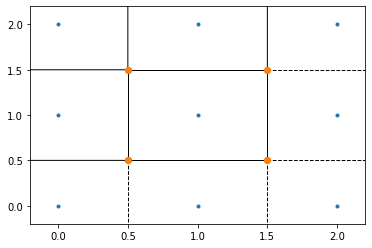

In [221]:
import matplotlib.pyplot as plt
fig = voronoi_plot_2d(vor)
plt.show()

In [265]:
points = [[-30.0, 30.370371], [-27.777777, 35.925926], [-34.444443, 58.51852], [-2.9629631, 57.777779], [-17.777779, 75.185181], [-29.25926, 58.148151], [-11.111112, 33.703705], [-11.481482, 40.0], [-27.037037, 40.0], [-7.7777777, 94.444443], [-2.2222223, 122.22222], [-20.370371, 106.66667], [1.1111112, 125.18518], [-6.2962961, 128.88889], [6.666667, 133.7037], [11.851852, 136.2963], [8.5185184, 140.74074], [20.370371, 92.962959], [17.777779, 114.81482], [12.962962, 97.037041], [13.333334, 127.77778], [22.592592, 120.37037], [16.296295, 127.77778], [11.851852, 50.740742], [20.370371, 54.814816], [19.25926, 47.40741], [32.59259, 122.96296], [20.74074, 130.0], [24.814816, 84.814819], [26.296295, 91.111107], [56.296295, 131.48149], [60.0, 141.85185], [32.222221, 136.66667], [53.703705, 147.03703], [87.40741, 196.2963], [34.074074, 159.62964], [34.444443, -2.5925925], [36.666668, -1.8518518], [34.074074, -7.4074073], [35.555557, -18.888889], [76.666664, -39.629627], [35.185184, -37.777779], [25.185184, 14.074074], [42.962959, 32.962963], [35.925926, 9.2592592], [52.222221, 77.777779], [57.777779, 92.222221], [47.037041, 92.59259], [82.222221, 54.074074], [48.888889, 24.444445], [35.925926, 47.777779], [50.740742, 69.259254], [51.111111, 51.851849], [56.666664, -12.222222], [117.40741, -4.4444447], [59.629631, -5.9259262], [66.666664, 134.07408], [91.481483, 127.40741], [66.666664, 141.48149], [53.703705, 4.0740738], [85.185181, 11.851852], [69.629631, 0.37037039], [68.518517, 99.259262], [75.185181, 100.0], [70.370369, 113.7037], [74.444443, 82.59259], [82.222221, 93.703697], [72.222221, 84.444443], [77.777779, 167.03703], [88.888893, 168.88889], [73.703705, 178.88889], [87.037041, 123.7037], [78.518517, 97.037041], [95.555557, 52.962959], [85.555557, 57.037041], [90.370369, 23.333332], [100.0, 28.51852], [88.888893, 37.037037], [87.037041, -42.962959], [89.259262, -24.814816], [93.333328, 7.4074073], [98.518517, 5.185185], [92.59259, 1.4814816], [85.925919, 153.7037], [95.555557, 154.44444], [92.962959, 150.0], [97.037041, 95.925919], [106.66667, 115.55556], [92.962959, 114.81482], [108.88889, 56.296295], [97.777779, 50.740742], [94.074081, 89.259262], [96.666672, 91.851852], [102.22222, 77.777779], [107.40741, 40.370369], [105.92592, 29.629629], [105.55556, -46.296295], [118.51852, -47.777779], [112.22222, -43.333336], [112.59259, 25.185184], [115.92592, 27.777777], [112.59259, 31.851852], [107.03704, -36.666668], [118.88889, -32.59259], [114.07408, -25.555555], [115.92592, 85.185181], [105.92592, 18.888889], [121.11111, 14.444445], [129.25926, -28.51852], [127.03704, -18.518518], [139.25926, -12.222222], [141.48149, 3.7037036], [137.03703, -4.814815], [153.7037, -26.666668], [-2.2222223, 5.5555558], [0.0, 9.6296301], [10.74074, 20.74074], [2.2222223, 54.074074], [4.0740738, 50.740742], [34.444443, 46.296295], [11.481482, 1.4814816], [24.074076, -2.9629631], [74.814819, 79.259254], [67.777779, 152.22223], [57.037041, 127.03704], [89.259262, 12.222222]]
points = np.array(points)

In [268]:
minlimit=points.min(axis=0)
maxlimit=points.max(axis=0)

In [269]:
vor = Voronoi(points,qhull_options="QJ")

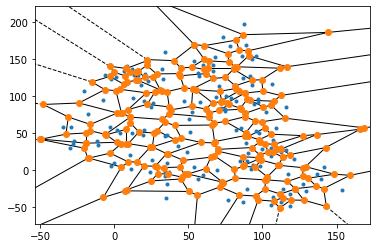

In [270]:
fig = voronoi_plot_2d(vor)
plt.show()

In [271]:
usefulVertex=list()
for vertex in vor.vertices:
    flag=True
    for index,parm in enumerate(vertex):
        if parm<minlimit[index] or parm>maxlimit[index]:
            flag=False
    if flag:
        usefulVertex.append(vertex)
            

In [272]:
len(usefulVertex)

223

In [274]:
vor.vertices.shape

(239, 2)

In [350]:
np.array([1,2,3]).argmax()

2

In [377]:
def LogRegister(jsonName,modelList,Experiments,ExpOuts,IteratioNum):
    import json
    interjson=dict()
    try:
        
        log=json.load(open(jsonName+".json"))
        
    except:
        log=dict()
    
    
    interjson["models"]=list()
    interjson["modelsScore"]=list()
    for model in modelList:
        modelRepot=dict()
        
        modelRepot["BestScore"]=model.best_score_
        modelRepot["BestParams"]=model.best_params_
        interjson["models"].append(modelRepot)    
        interjson["modelsScore"].append(model.best_score_)
        
    
    interjson["PointNumber"]=len(Experiments)
    interjson["Experiments"]=Experiments.tolist()
    interjson["Outs"]=ExpOuts.tolist()
    interjson["Iteration"]=IteratioNum
    print(log)
    log.update({str(IteratioNum):interjson})
    MaxScore=np.array(interjson["modelsScore"]).max()
    MaxArgmax=np.array(interjson["modelsScore"]).argmax()
    bestModel=interjson["models"][MaxArgmax]["BestParams"]
    print("--------------------------------------------------------")
    print("Iteration {}".format(IteratioNum))
    print("Best model {}".format(bestModel))
    print("Best model score  {}".format(MaxScore))
    print("Number of experiments {}".format(len(Experiments)))
    s = json.dumps(log)
    open(jsonName+".json","w").write(s)
    

In [379]:
LogRegister("mganet",[modeloSVM ,modeloSVM ], mats['Experimments'],mats['Expout'].reshape(33),1)

entro
{'3': {'models': [{'BestScore': -0.07055820741242444, 'BestParams': {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}}, {'BestScore': -0.07055820741242444, 'BestParams': {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}}], 'modelsScore': [-0.07055820741242444, -0.07055820741242444], 'PointNumber': 33, 'Experiments': [[8245.5, 0.3685, 55.5, 64.25, 11.0, 11.75, 0.49000000000000005], [200.0, 0.511, 71.0, 86.0, 14.0, 3.5, 0.18], [16291.0, 0.511, 71.0, 86.0, 14.0, 3.5, 0.18], [200.0, 0.226, 71.0, 86.0, 14.0, 3.5, 0.18], [16291.0, 0.226, 71.0, 86.0, 14.0, 3.5, 0.18], [200.0, 0.511, 40.0, 42.5, 8.0, 3.5, 0.18], [16291.0, 0.511, 40.0, 42.5, 8.0, 3.5, 0.18], [200.0, 0.226, 40.0, 42.5, 8.0, 3.5, 0.18], [16291.0, 0.226, 40.0, 42.5, 8.0, 3.5, 0.18], [200.0, 0.511, 71.0, 86.0, 14.0, 20.0, 0.18], [16291.0, 0.511, 71.0, 86.0, 14.0, 20.0, 0.18], [200.0, 0.226, 71.0, 86.0, 14.0, 20.0, 0.18], [16291.0, 0.226, 71.0, 86.0, 14.0, 20.0, 0.18], [200.0, 0.511, 40.0, 42.5, 8.0, 20.0, 0.18], [16291.0, 0.511, 40.0, 42.5